In [1]:
% matplotlib inline

In [2]:
import scipy
import math
from matplotlib import pyplot as plt
import numpy as np
import csv
from itertools import combinations 
#import scikit

In [3]:
data=[]
label=[]
with open('train.csv','rt') as csv_file:
    allsamples = csv.reader(csv_file, delimiter="\t")
    next(allsamples)
    for sample in allsamples:
        if sample:
            sample = sample[0]
            sample = sample.split(",")
            data.append(sample[1:])
            label.append(sample[0])
data = np.array(data)
data = data.astype(float)

In [4]:
#(b)
def display_image(data):
    data = np.array(data)
    data = np.reshape(data,(-1,28))
    plt.imshow(data,cmap='gray')
    plt.show()

In [5]:
#(c)
for i in range(0,10):
    ind = label.index(str(i))
    #display_image(data[ind])
    #print(label[ind])

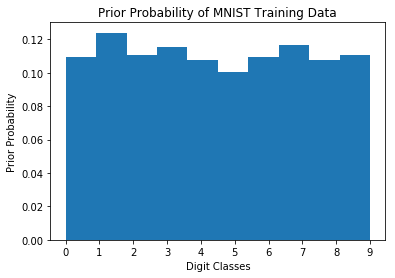

In [6]:
plt.hist(np.array(label,dtype=int),density=1)
plt.xticks(np.arange(0, 10, step=1))
plt.xlabel('Digit Classes')
plt.ylabel('Prior Probability')
plt.title(r'Prior Probability of MNIST Training Data')
plt.show()


In [7]:
#(d)
def get_dist(d1,d2):
    diff = np.array(d1)-np.array(d2)
    #distance = math.sqrt(sum([(a - b) ** 2 for a, b in zip(d1, d2)]))
    return np.linalg.norm(diff)
    #return math.sqrt(np.dot(diff,diff))

def get_dist_batch(batch1,batch2): #batch is a ndarray
    all_dist = []
    c=0
    for a in batch1:
        if c%1000==0:
            print(c)
        c+=1
        mat1 = np.tile(a, (len(batch2), 1))
        mat2 = np.array(batch2)
        dist = (mat1-mat2)**2
        dist = (np.sum(dist, axis = 1))**0.5
        all_dist.append(dist)

    all_dist = np.array(all_dist)
    return all_dist.flatten()

#     train_num = batch1.shape[0] # n
#     test_num = batch2.shape[0]  # m

#     train_tensor = np.repeat(batch1[:, :, np.newaxis], test_num, axis=2) # n * d * m
#     test_tensor = np.repeat(batch2[:, :, np.newaxis], train_num, axis=2) # m * d * n
#     test_tensor = np.swapaxes(test_tensor,0,2) # swap axis n*d*m
#     dist = (train_tensor - test_tensor)**2 # difference and square
#     dist = (np.sum(dist, axis = 1))**0.5 # sum along the 2nd axis, and take square root
#     print(dist.shape)
#     return dist.flatten()


def get_nn(index, data, label):
    best_dist = math.inf
    for j in range(len(label)):
        if j != index:
            dist = get_dist(data[index],data[j])
            if dist < best_dist:
                best_dist = dist
                cur_nn = j
    if label[index] != label[cur_nn]:
        print(label[index], label[cur_nn])

In [ ]:
# train_num = batch1.shape[0] # n
# test_num = batch2.shape[0]  # m 

# train_tensor = np.repeat(batch1[:, :, np.newaxis], test_num, axis=2) # n * d * m
# test_tensor = np.repeat(batch2[:, :, np.newaxis], train_num, axis=2) # m * d * n
# test_tensor = np.swapaxes(test_tensor,0,2) # swap axis n*d*m
# dist = (train_tensor - test_tensor)**2 # difference and square
# dist = (np.sum(dist, axis = 1))**0.5 # sum along the 2nd axis, and take square root
# return dist

In [8]:
for i in range(0,10):
    ind = label.index(str(i))
    get_nn(ind, data, label)
#     best_dist = math.inf
#     for j in range(len(label)):
#         if j != ind:
#             dist = get_dist(data[ind],data[j])
#             if dist < best_dist:
#                 best_dist = dist
#                 cur_nn = j
#             #if dist = best_dist:
#             #    cur_nn.append(j)
#     print(i, label[cur_nn])

3 5


In [9]:
#(e)
zeros = np.where(np.array(label,dtype=int) == 0)[0]
ones = np.where(np.array(label,dtype=int) == 1)[0]
data_zeros = [data[i] for i in zeros]
data_ones = [data[i] for i in ones]

data_zeros_ones = [data[i] for i in np.concatenate((zeros, ones), axis=None)]
label_zeros_ones = [label[i] for i in np.concatenate((zeros, ones), axis=None)]

# for ind in range(len(label_zeros_ones)):
#     get_nn(ind,data_zeros_ones,label_zeros_ones)

In [20]:
zeros_comb = combinations(zeros,2)
ones_comb = combinations(ones,2)

In [28]:
genuine_dist = []
imposter_dist = get_dist_batch(data_zeros, data_ones)
for i in list(zeros_comb): 
    genuine_dist.append(get_dist(data[i[0]],data[i[1]]))

for j in list(ones_comb): 
    genuine_dist.append(get_dist(data[j[0]],data[j[1]]))


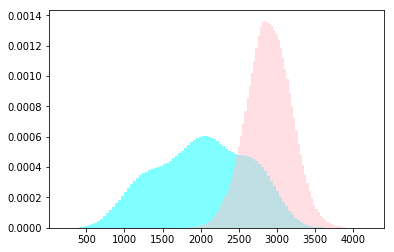

In [39]:
plt.hist(genuine_dist,density=True,bins=100,color='cyan',alpha=.5)
plt.hist(imposter_dist,density=True,bins=100,color='pink',alpha=.5)
plt.show()
#weights=[1/len(genuine_dist)]*len(genuine_dist)

In [45]:
#(f)
genuine_dist = np.array(genuine_dist)
imposter_dist = np.array(imposter_dist)
genuine_dist.sort()
imposter_dist.sort()

Equal Error: 0.18548861110261458
Equal Error: 0.18600529247058842
Equal Error: 0.18652197383856228


Text(0,0.5,'True Positive')

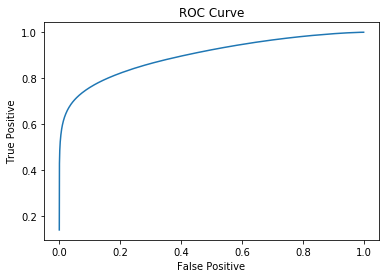

In [55]:
tpr_list=[]
fpr_list=[]
for i in range(0, len(imposter_dist), 10000):
    fpr = i/float(len(imposter_dist))
    tpr = np.argmax(genuine_dist>=imposter_dist[i])/float(len(genuine_dist))
    tpr_list.append(tpr)
    fpr_list.append(fpr)
    fnr = 1 - tpr
    if ("%.2f" %fnr == "%.2f" %fpr):
        print("Equal Error: " + repr(fpr))
plt.plot(fpr_list,tpr_list)
plt.title("ROC Curve")
plt.xlabel("False Positive")
plt.ylabel("True Positive") 
#plt.show()

In [5]:
#(g)
def find_NN(k,distList,yTr):
    arg_sorted = np.argsort(distList,axis=1)
    distList = distList[np.arange(np.shape(distList)[0])[:,np.newaxis],arg_sorted]
    yTr = np.tile(yTr, (len(distList), 1))
    yTr = yTr[np.arange(np.shape(yTr)[0])[:,np.newaxis],arg_sorted]
    nn_list = []
    for i in range(len(yTr)):
        if i%100000==0:
            print("find_NN: " + str(i))
        neighbors = yTr[i,:np.argmax(distList[i]>distList[i,k-1])]
        vote = np.bincount(neighbors)
        #print(vote)
        nn = np.where(vote==np.max(vote))[0]
        #print(nn)
        nn_list.append(nn[np.random.randint(len(nn), size=1)])
    return nn_list
    
def classify(k, xTe, xTr=data, yTr=np.array(label,dtype=int)):
    k = int(k)
    distMat = get_dist_batch(xTr,xTe)
    distMat = distMat.reshape(-1,len(xTr))
    voteResult = find_NN(k,distMat,yTr)
    return voteResult 

In [6]:
#(f)
def cross_val(k, xTr=data[:],yTr=np.array(label[:],dtype=int)):
    set_size = int(round(len(yTr)/3.0))
    np.random.seed(3)
    shuffled = np.arange(len(yTr))
    np.random.shuffle(shuffled)
    shuffled = np.array(shuffled)
    sets = [shuffled[0:set_size],shuffled[set_size:2*set_size],shuffled[2*set_size:len(yTr)]]
    acc_list=[]
    y_pred_list=[]
    s_yTe_list=[]

    for i in range(3):
        print(i)
        s_xTe = np.take(xTr,sets[i], axis= 0)
        s_yTe = np.take(yTr,sets[i], axis= 0)
        s_xTr = np.take(xTr,np.append(sets[(i+1)%3],sets[(i+2)%3]), axis= 0)
        s_yTr = np.take(yTr,np.append(sets[(i+1)%3],sets[(i+2)%3]), axis= 0)
        y_pred = np.array(classify(k, s_xTe, s_xTr, s_yTr))
        acc = (y_pred==s_yTe)[0].sum()/float(len(s_yTe))
        print(acc)
        acc_list.append(acc)
        y_pred_list.append(y_pred)
        s_yTe_list.append(s_yTe)
    print(acc_list)
    return acc_list,y_pred_list,s_yTe_list
avg_acc, y_pred_list, s_yTe_list = cross_val(3)
    
    

0


KeyboardInterrupt: 